In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skrf as rf
from skrf.media import *
import json


(6.25, 6.75)

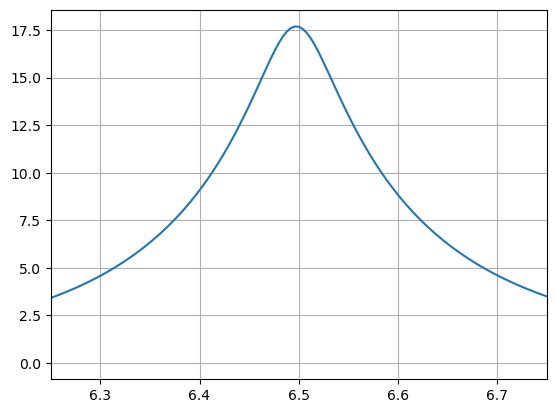

In [101]:
fghz  = np.linspace(4,8,1001)
f = fghz*1e9
sopen = fghz*0j + 1
open_network = rf.Network(frequency=f, s=sopen, z0=50)
C_shunt = 10e-12 # farads
L_shunt = 60e-12 # henries
R_shunt = -65 # ohms
omega = 2*np.pi*f
Y_c_shunt = 1j*omega*C_shunt
Y_l_shunt = 1/(1j*omega*L_shunt)
Y_r_shunt = 1/R_shunt

c_in = 1.5e-12
Z_c_in = 1/(1j*2*np.pi*f)

c_shunt_network = rf.Circuit.ShuntAdmittance(f, Y_c_shunt, name='shunt_admittance')
l_shunt_network = rf.Circuit.ShuntAdmittance(f, Y_l_shunt, name='shunt_admittance2')
r_shunt_network = rf.Circuit.ShuntAdmittance(f, Y_r_shunt, name='shunt_admittance3')
cin_series_network = rf.Circuit.SeriesImpedance(f,Z_c_in,name='cin')
jpa = cin_series_network**l_shunt_network**c_shunt_network**r_shunt_network**open_network
plt.plot(fghz,jpa.s_db[:,0,0])
plt.grid()
plt.xlim(6.25,6.75)